# **DSL 24-1 기초 과제 1**

### 기수 : 12
### 이름 : 추준식

In [ ]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필수 라이버러리 갖고오기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [ ]:
path_to_image = "/content/drive/MyDrive/DSL/과제/data/image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

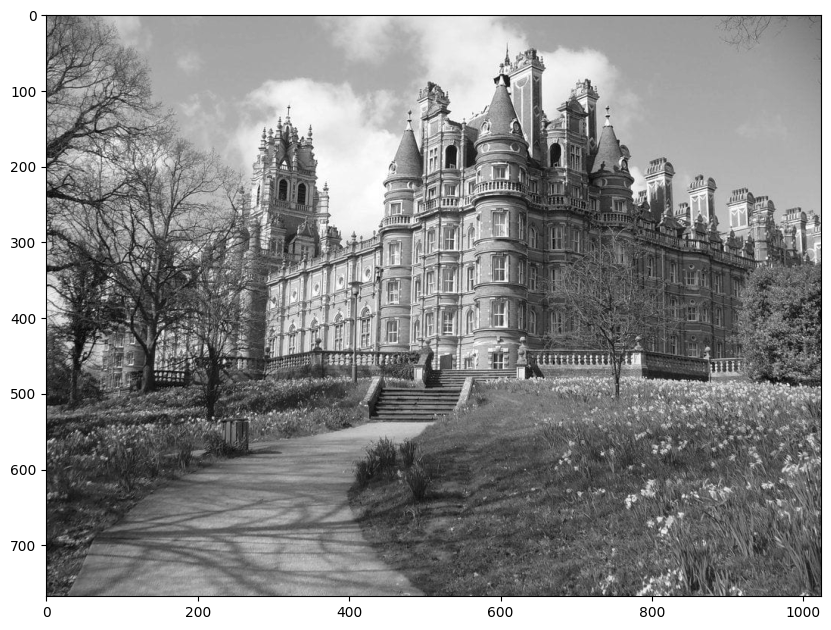

In [ ]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [ ]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [ ]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

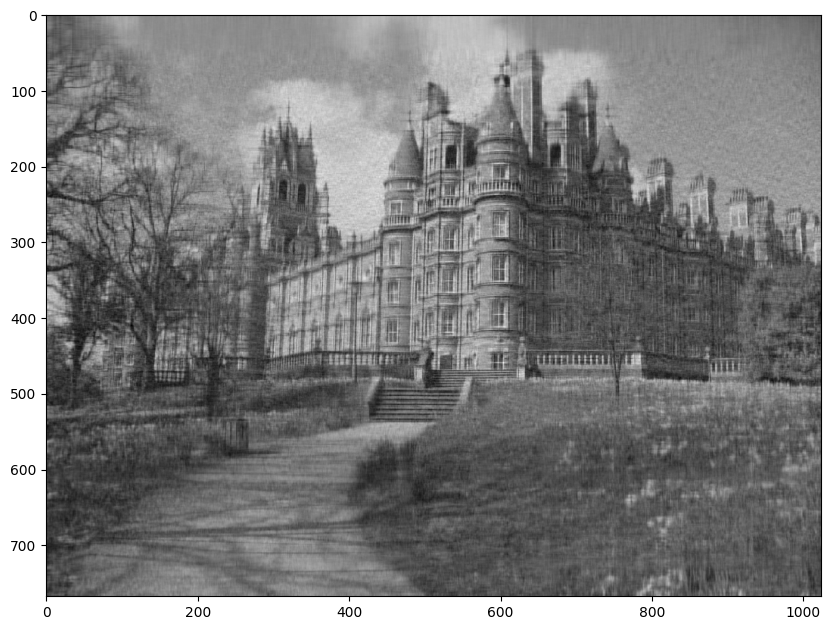

In [ ]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [ ]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 7.31273 seconds
Processing Time for 10 Compressed Images: 0.42185 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다.
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [ ]:
path_to_image = "/content/drive/MyDrive/DSL/과제/data/bangul.jpg"

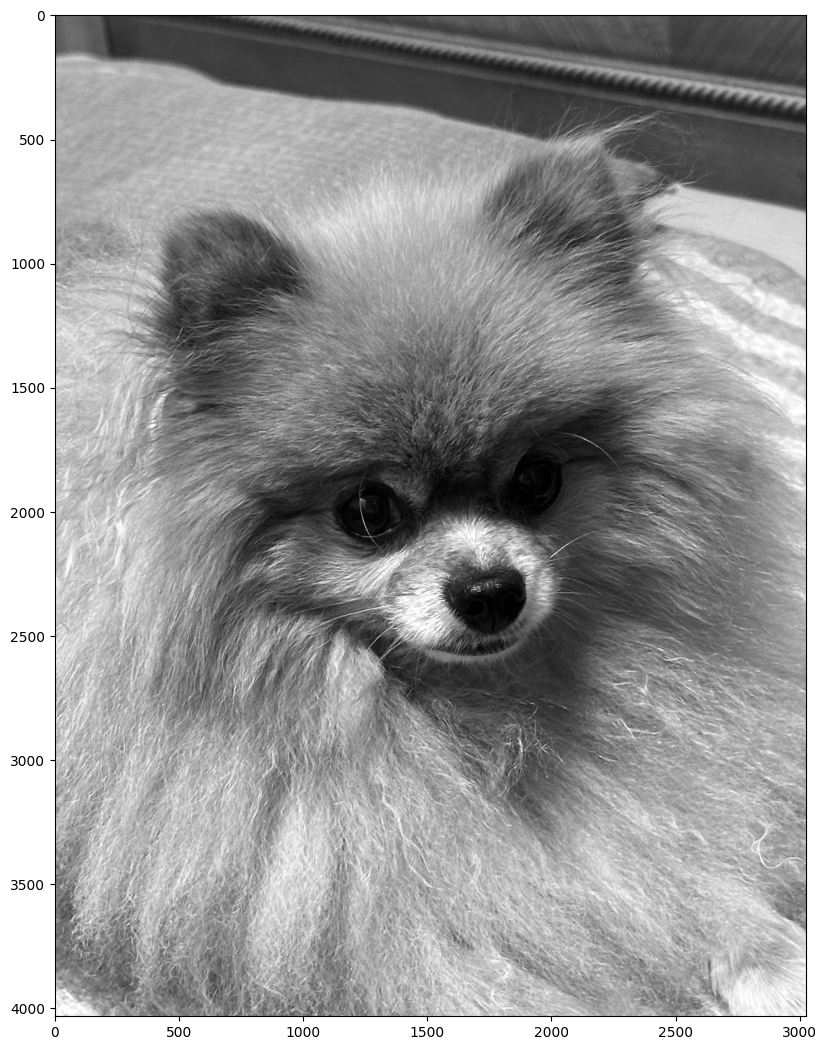

In [ ]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [ ]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (4032, 3024)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [ ]:
num_elements = 100

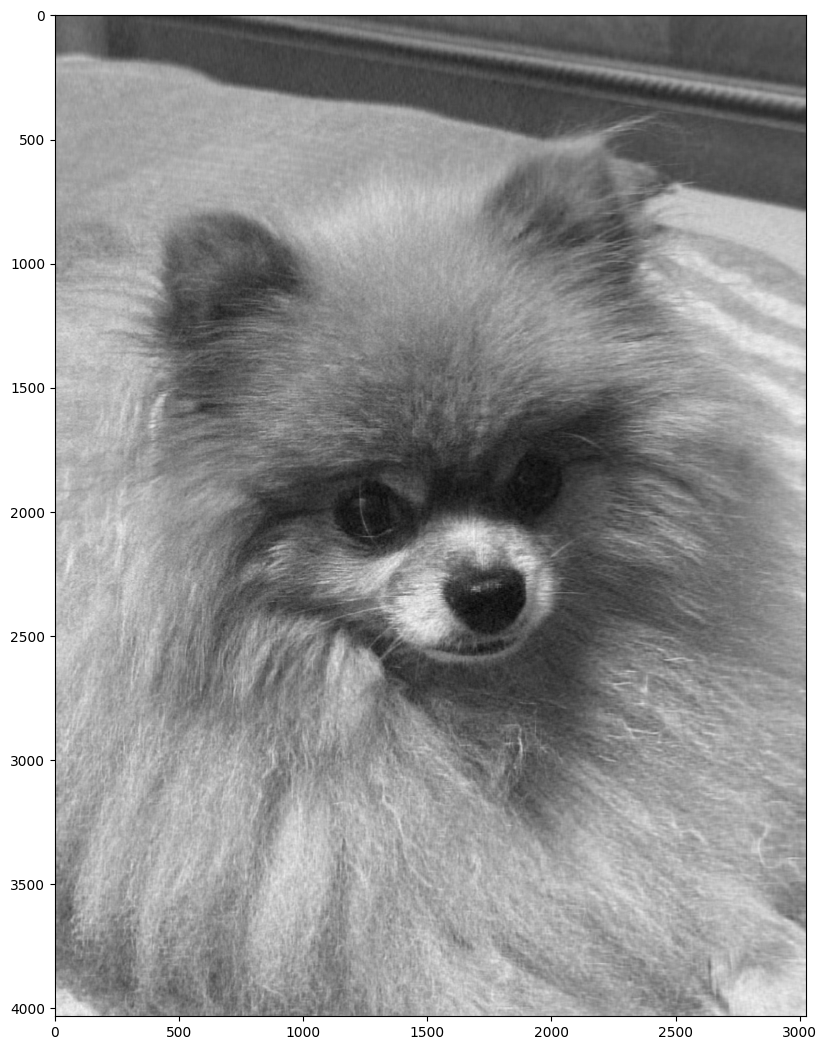

In [ ]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [ ]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  25404624  Non-zero Elements
Image Composition uses  493990  Non-zero Elements
Processing Time for 10 Full Images: 98.55015 seconds
Processing Time for 10 Compressed Images: 1.46693 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [ ]:
path_to_csv = "/content/drive/MyDrive/DSL/과제/data/heights.csv"

전처리

In [ ]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [ ]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [ ]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [ ]:
  Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

In [ ]:
# 각 학회별 데이터 분할
DSL = data[data['which'] == 'DSL']['heights']
ESC = data[data['which'] == 'ESC']['heights']
Else = data[data['which'] == 'Else']['heights']

# ANOVA 테스트 수행
f_statistic, p_value = stats.f_oneway(DSL, ESC, Else)

# 유의수준
alpha = 0.05

# 검정 결과 출력
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("귀무가설을 기각합니다. 적어도 하나의 학회의 평균 키가 다릅니다.")
else:
    print("귀무가설을 채택합니다. 세 학회의 평균 키가 동일합니다.")

F-statistic: 6.82185346949053
P-value: 0.0013059664602332191
귀무가설을 기각합니다. 적어도 하나의 학회의 평균 키가 다릅니다.


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [ ]:
import pandas as pd

path_to_csv = "/content/drive/MyDrive/DSL/과제/data/train.csv"
data = pd.read_csv(path_to_csv)

In [ ]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [ ]:
# TO-DO

# 1. Name 변수에 대한 전처리
# 2. 전처리 한 변수를 다시 dataframe에 추가

data['filteredName'] = data['Name'].apply(lambda x: x.split(',')[0])
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked filteredName  
0      0         A/5 21171   7.2500   NaN        S       Braund  
1      0          PC 17599  71.2833   C85        C      Cumings  
2      0  STON/O2. 3101282   7.9250   NaN        S    Heikkinen

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [ ]:
# TO-DO

# 정렬
data = data.sort_values(by='Age')
data.head(3)

PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked filteredName  
803  0.42      0      1    2625   8.5167   NaN        C       Thomas  
755  0.67      1      1  250649  14.5000   NaN        S   Hamalainen  
644  0.75      2      1    2666  19.2583   NaN        C      Baclini

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

[nan 'C22 C26' 'F4' 'G6' 'F2' 'A34' 'E121' 'B96 B98' 'B5' 'B18' 'D28'
 'B79' 'C70' 'B20' 'C65' 'B57 B59 B63 B66' 'E68' 'C62 C64' 'D47'
 'C23 C25 C27' 'F G73' 'B49' 'B42' 'D30' 'D26' 'D9' 'B39' 'E33' 'C2' 'D36'
 'D' 'D10 D12' 'B86' 'B35' 'F33' 'B58 B60' 'C54' 'C90' 'E50' 'C148' 'E101'
 'E8' 'D49' 'C82' 'A6' 'C52' 'D6' 'B73' 'E36' 'C111' 'B77' 'C7' 'B71'
 'A24' 'D15' 'B50' 'E10' 'B51 B53 B55' 'C78' 'D56' 'C93' 'C99' 'B101'
 'E24' 'C83' 'C123' 'C46' 'B22' 'A10' 'E25' 'C32' 'D35' 'C118' 'C45' 'B28'
 'C91' 'C85' 'E67' 'E44' 'C68' 'E49' 'A36' 'A31' 'C125' 'B94' 'E34' 'E40'
 'F G63' 'D19' 'B3' 'B4' 'B38' 'T' 'C124' 'B82 B84' 'E31' 'D46' 'C110'
 'E63' 'E58' 'C126' 'E12' 'D17' 'D33' 'A16' 'C92' 'A20' 'C49' 'C86' 'D11'
 'E17' 'D20' 'B69' 'C104' 'C101' 'E46' 'C30' 'A7' 'A26' 'C50' 'E77' 'D48'
 'B80' 'C103' 'B37' 'B41' 'D37' 'B19' 'D50' 'C87' 'D7' 'B30' 'E38' 'A5'
 'A23' 'B78' 'F E69' 'A32' 'A19' 'C106' 'C128' 'D21' 'A14' 'C95' 'D45'
 'F38' 'B102' 'C47']


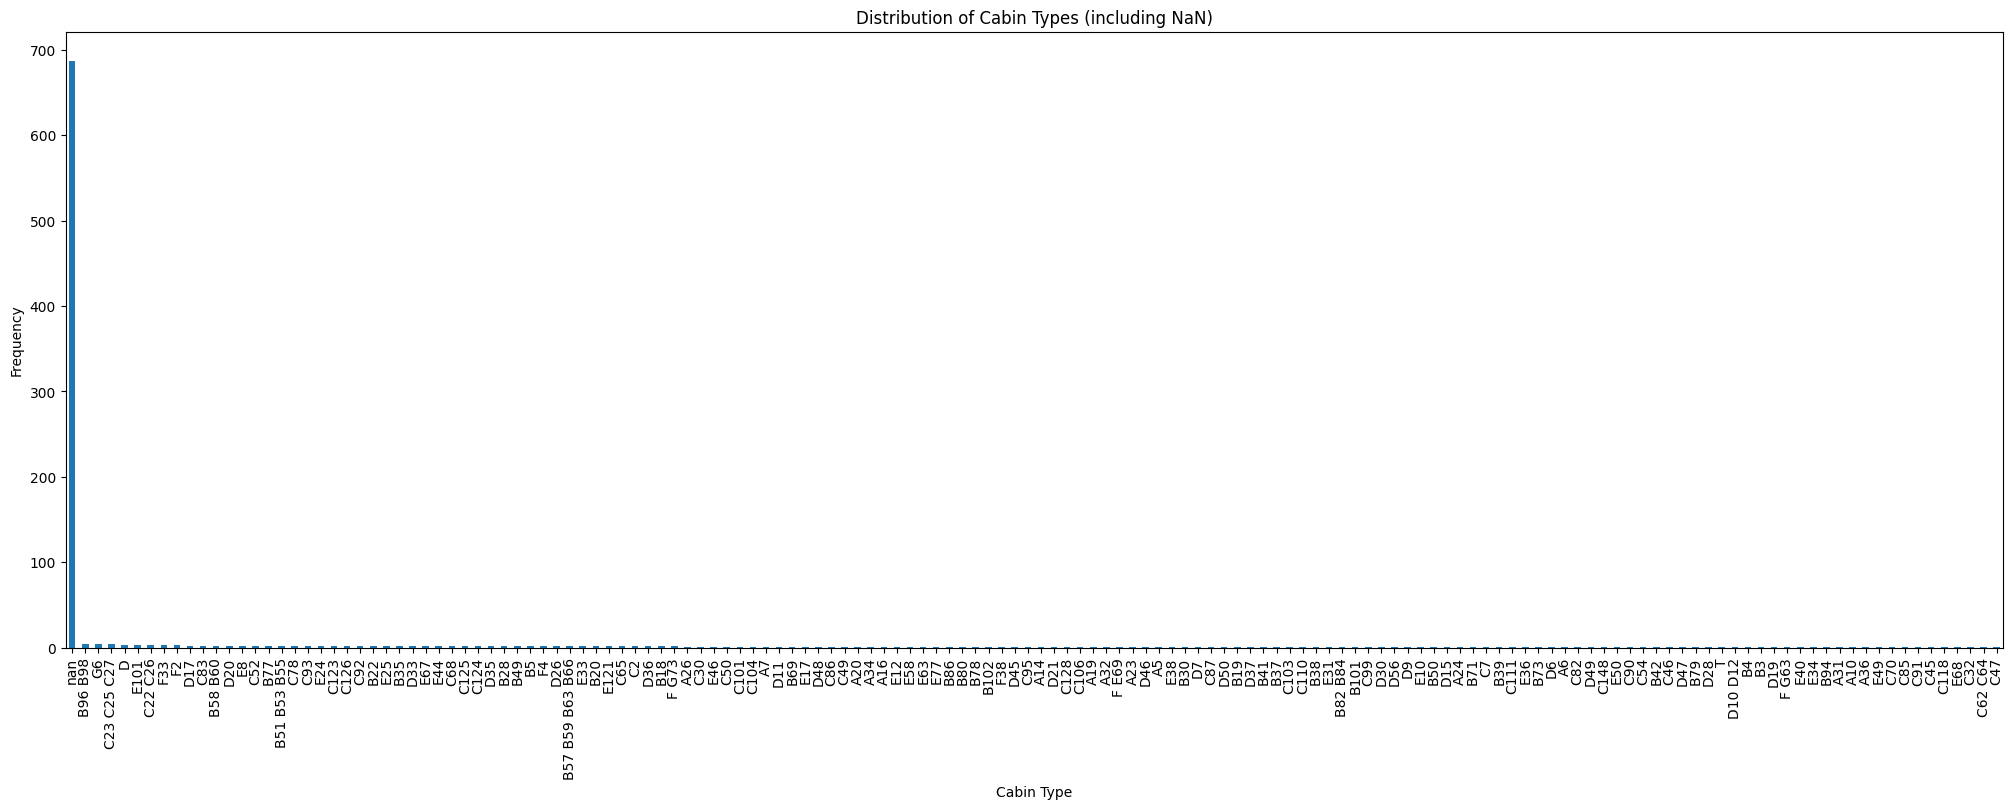

In [ ]:
# TO-DO

# 1. Cabin 변수의 값 종류 확인
# 2. 히스토그램 시각화
cabin_unique = data['Cabin'].unique()
print(cabin_unique)

cabin_counts = data['Cabin'].value_counts(dropna=False)
plt.figure(figsize=(25, 8))
cabin_counts.plot(kind='bar')
plt.title('Distribution of Cabin Types (including NaN)')
plt.xlabel('Cabin Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

6-4. (Optional)

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

In [ ]:
# 로지스틱 회귀 모델
import statsmodels.api as sm
X = data[['SibSp', 'Parch']]
y = data['Survived']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.659762
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                0.009236
Time:                        16:15:01   Log-Likelihood:                -587.85
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                  0.004171
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5052      0.080     -6.331      0.000      -0.662      -0.349
SibSp         -0.1603      0.

	Parch 변수가 생존 여부에 더 큰 영향을 미칩니다.
	•	계수의 크기: Parch의 계수가 절대값으로 더 크므로, Parch가 생존 여부에 더 큰 영향을 미친다고 볼 수 있습니다.
	•	p-값: Parch의 p-값이 더 작기 때문에, 더 높은 통계적 유의성을 갖고 있다고 할 수 있습니다.

따라서, SibSp와 Parch 중 Parch 변수를 선택하는 것이 더 합리적입니다.

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [ ]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

# TO-DO
tensor = np.array([
    arr[0:2, 0:2],  # 좌측 상단
    arr[1:3, 0:2],  # 좌측 하단
    arr[0:2, 1:3],  # 우측 상단
    arr[1:3, 1:3]   # 우측 하단
])

print(tensor)
print(tensor.shape)


[[[1 2]
  [4 5]]

 [[4 5]
  [7 8]]

 [[2 3]
  [5 6]]

 [[5 6]
  [8 9]]]
(4, 2, 2)


6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.


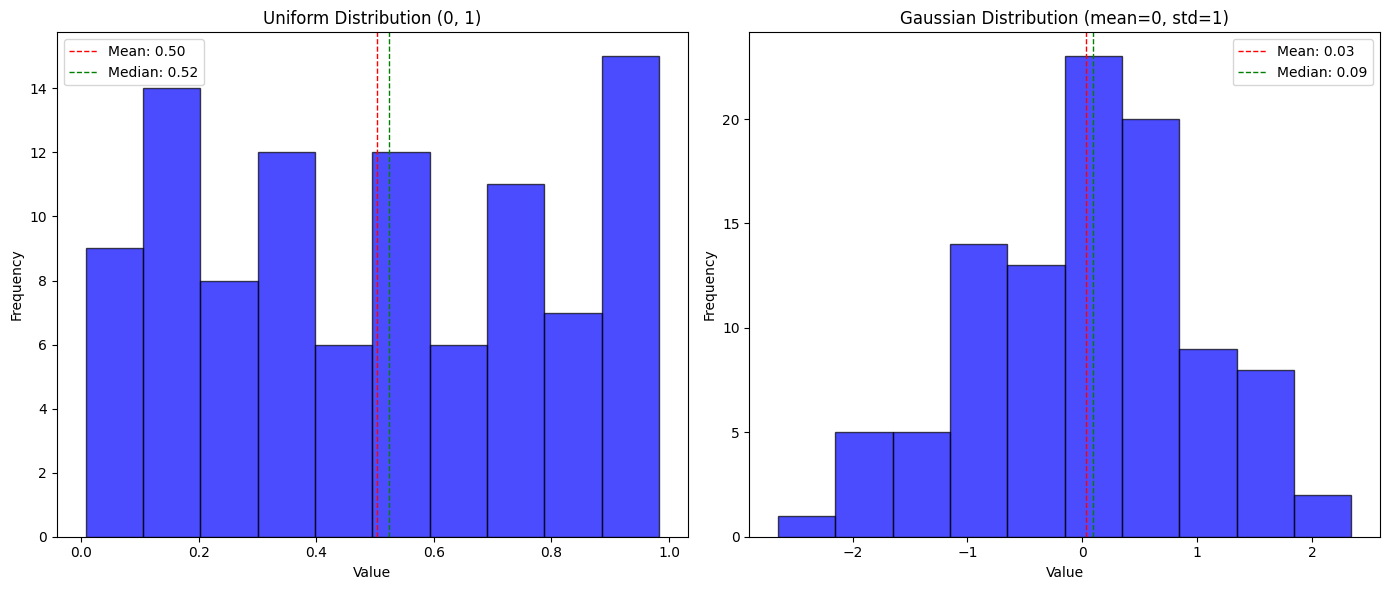

In [ ]:
# TO-DO

# 1. Uniform Distribution으로부터 100개의 점 Sampling
uniform_samples = np.random.uniform(0, 1, 100)
# 2. Gaussian Distribution으로부터 100개의 점 Sampling
gaussian_samples = np.random.normal(0, 1, 100)
# 3. 시각화
uniform_mean = np.mean(uniform_samples)
uniform_median = np.median(uniform_samples)
gaussian_mean = np.mean(gaussian_samples)
gaussian_median = np.median(gaussian_samples)

# 4. 평균/중앙값 점선으로 시각화
plt.figure(figsize=(14, 6))

# Uniform Distribution plot
plt.subplot(1, 2, 1)
plt.hist(uniform_samples, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(uniform_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {uniform_mean:.2f}')
plt.axvline(uniform_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {uniform_median:.2f}')
plt.title('Uniform Distribution (0, 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Gaussian Distribution plot
plt.subplot(1, 2, 2)
plt.hist(gaussian_samples, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(gaussian_mean, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {gaussian_mean:.2f}')
plt.axvline(gaussian_median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {gaussian_median:.2f}')
plt.title('Gaussian Distribution (mean=0, std=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()